Binary Prediction with a Rainfall Dataset

Load the train and test CSV files
Check for missing values and data types (Data Cleaning)
Exploratory Data Analysis (EDA) with visualizations
Feature Engineering
Model Selection (best suited for binary classification)
Train and Evaluate the model (accuracy and RMSE)
Make predictions on the test data
Create submission CSV file


Missing values in train:
 id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

Missing values in test:
 id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

Data types:
 id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object


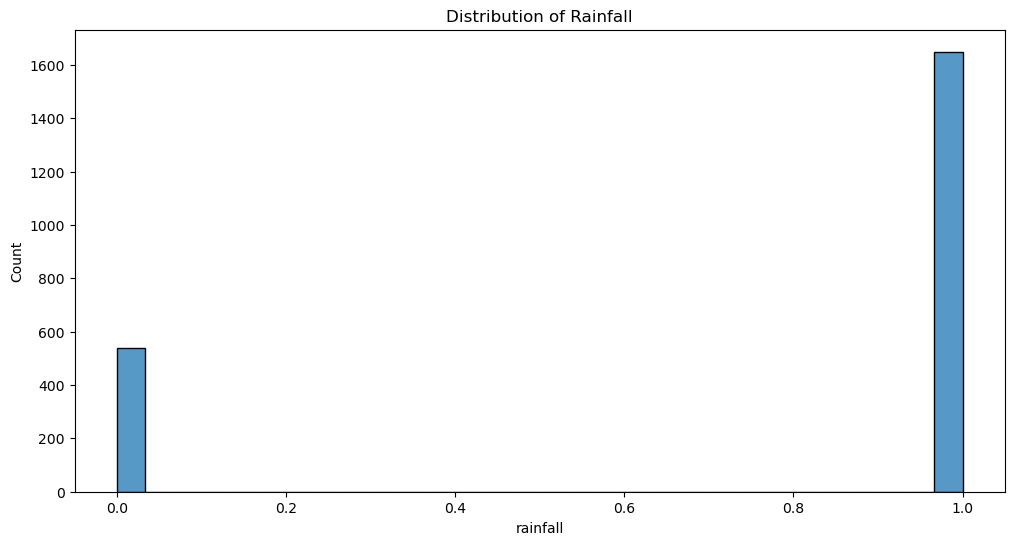

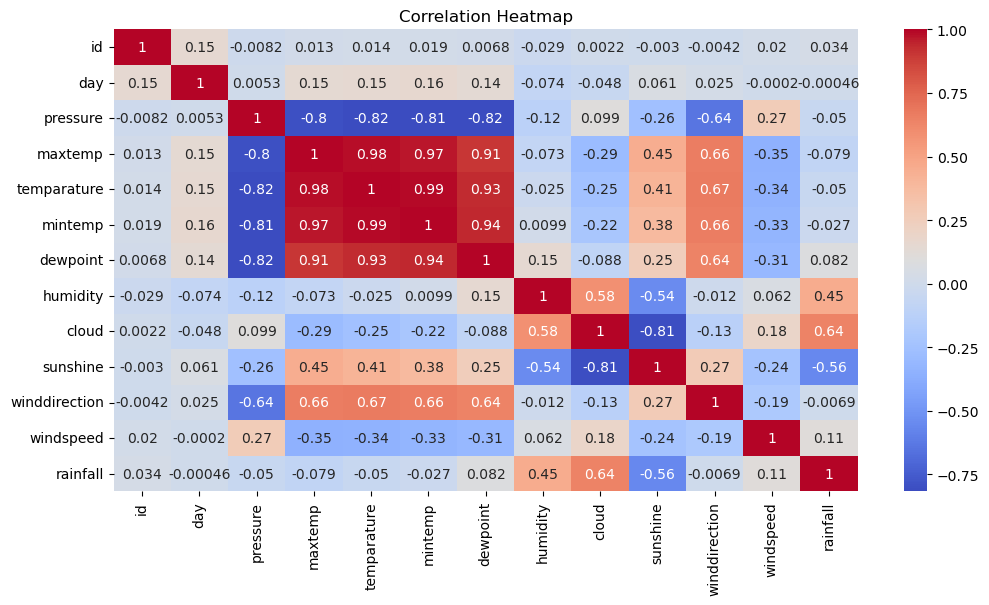

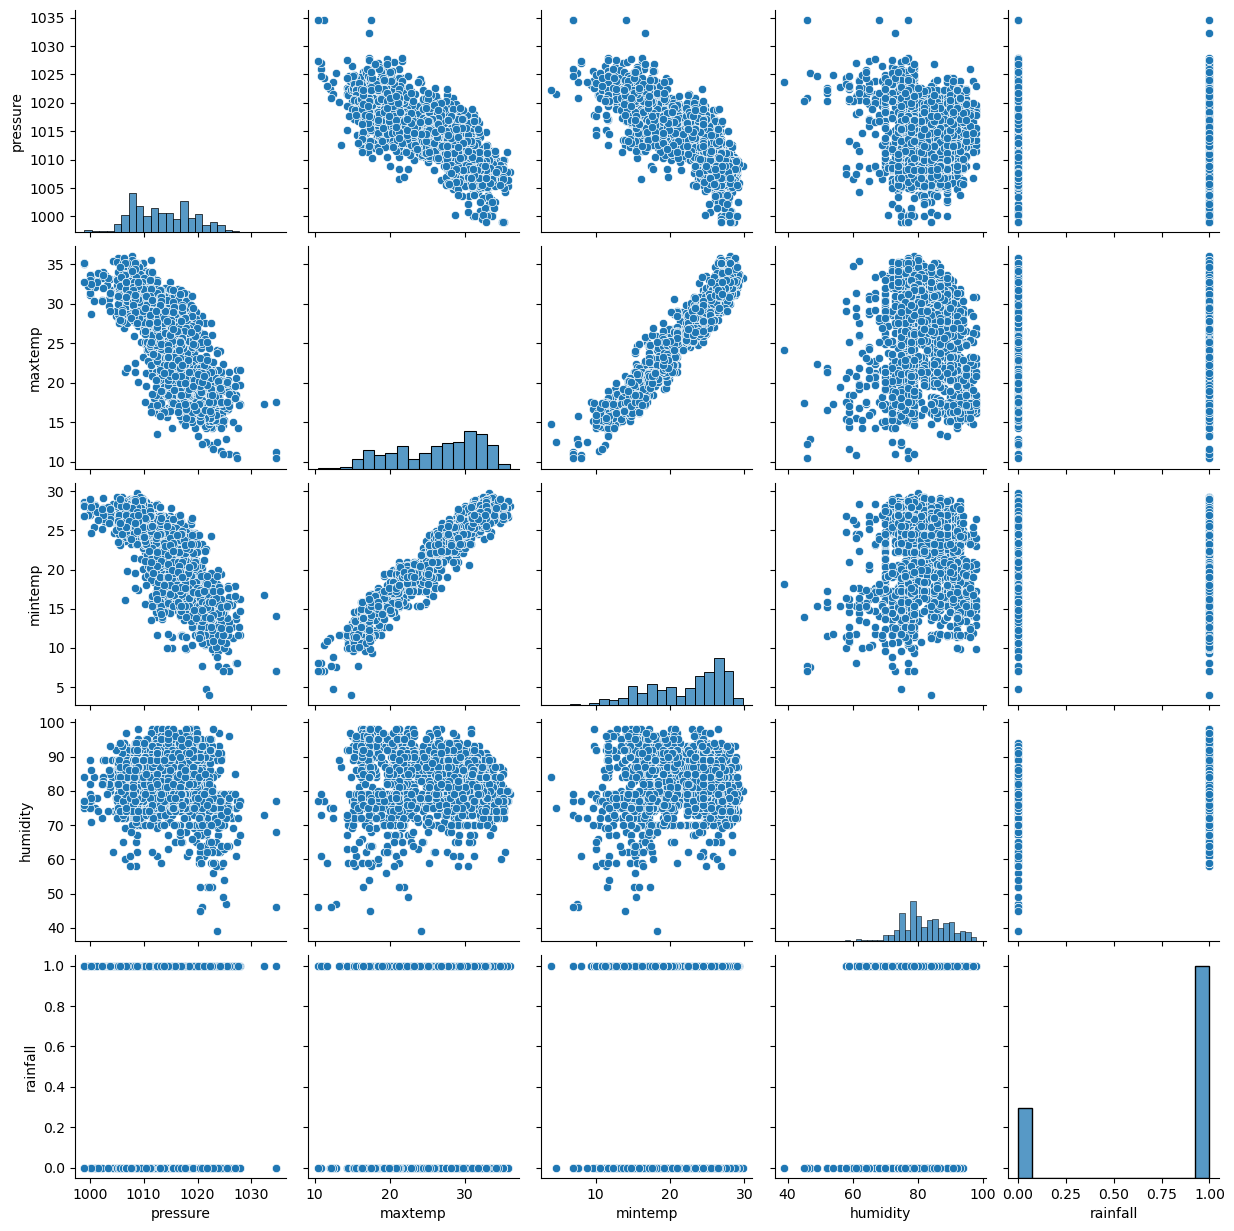

Model Accuracy: 0.8493
Model RMSE: 0.3882


In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import joblib

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Step 1: Data Cleaning
print("Missing values in train:\n", train.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())
print("\nData types:\n", train.dtypes)

# Fill missing values if any
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# Step 2: EDA
plt.figure(figsize=(12, 6))
sns.histplot(train['rainfall'], bins=30)
plt.title('Distribution of Rainfall')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(train[['pressure', 'maxtemp', 'mintemp', 'humidity', 'rainfall']])
plt.show()

# Insights:
# - Humidity, cloud, and dewpoint seem positively correlated with rainfall.
# - Sunshine is negatively correlated with rainfall.

# Step 3: Feature Engineering
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

X = train[features]
y = train['rainfall']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test[features])

# Step 4: Model Training (Random Forest for binary classification)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model RMSE: {rmse:.4f}")

# Step 5: Predict on test data and prepare submission
test['rainfall'] = model.predict(test_scaled)

# Submission file
#submission = test[['id', 'rainfall']]
#submission.to_csv('submission.csv', index=False)
#print("Submission file created: submission.csv")


In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Step 1: Data Cleaning
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# Optional: Check class balance
print(train['rainfall'].value_counts())

# If imbalanced, apply SMOTE
X = train[['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]
y = train['rainfall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test[X.columns])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 2: Model Training using XGBoost
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Improved Model Accuracy: {accuracy:.4f}")
print(f"Improved Model RMSE: {rmse:.4f}")

# Step 3: Predict on test data and prepare submission
test['rainfall'] = model.predict(test_scaled)

# Submission file
#submission = test[['id', 'rainfall']]
#submission.to_csv('submission.csv', index=False)
#print("Submission file created: submission.csv")


1    1650
0     540
Name: rainfall, dtype: int64
Improved Model Accuracy: 0.8970
Improved Model RMSE: 0.3210


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Cleaning
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# Feature and target
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
X = train[features]
y = train['rainfall']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test[features])

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# GridSearchCV for XGBoost
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

xgb = XGBClassifier(random_state=42)
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                    cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")

# Best model after tuning
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Tuned Model Accuracy: {accuracy:.4f}")
print(f"Tuned Model RMSE: {rmse:.4f}")

# Predict on test data and prepare submission
test['rainfall'] = best_model.predict(test_scaled)
submission = test[['id', 'rainfall']]
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}
Tuned Model Accuracy: 0.9076
Tuned Model RMSE: 0.3040
Submission file created: submission.csv
